In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

**Load the MNIST dataset**

In [ ]:
#Load the mnist dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

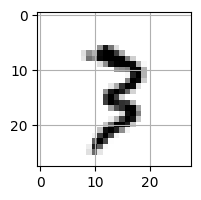

In [ ]:
plt.figure(figsize=(2,2))
plt.imshow(train_images[25000], cmap=plt.cm.binary)
plt.grid(True)
plt.show()

In [ ]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


**Normalize the images**

In [ ]:
train_images = train_images
test_images = test_images

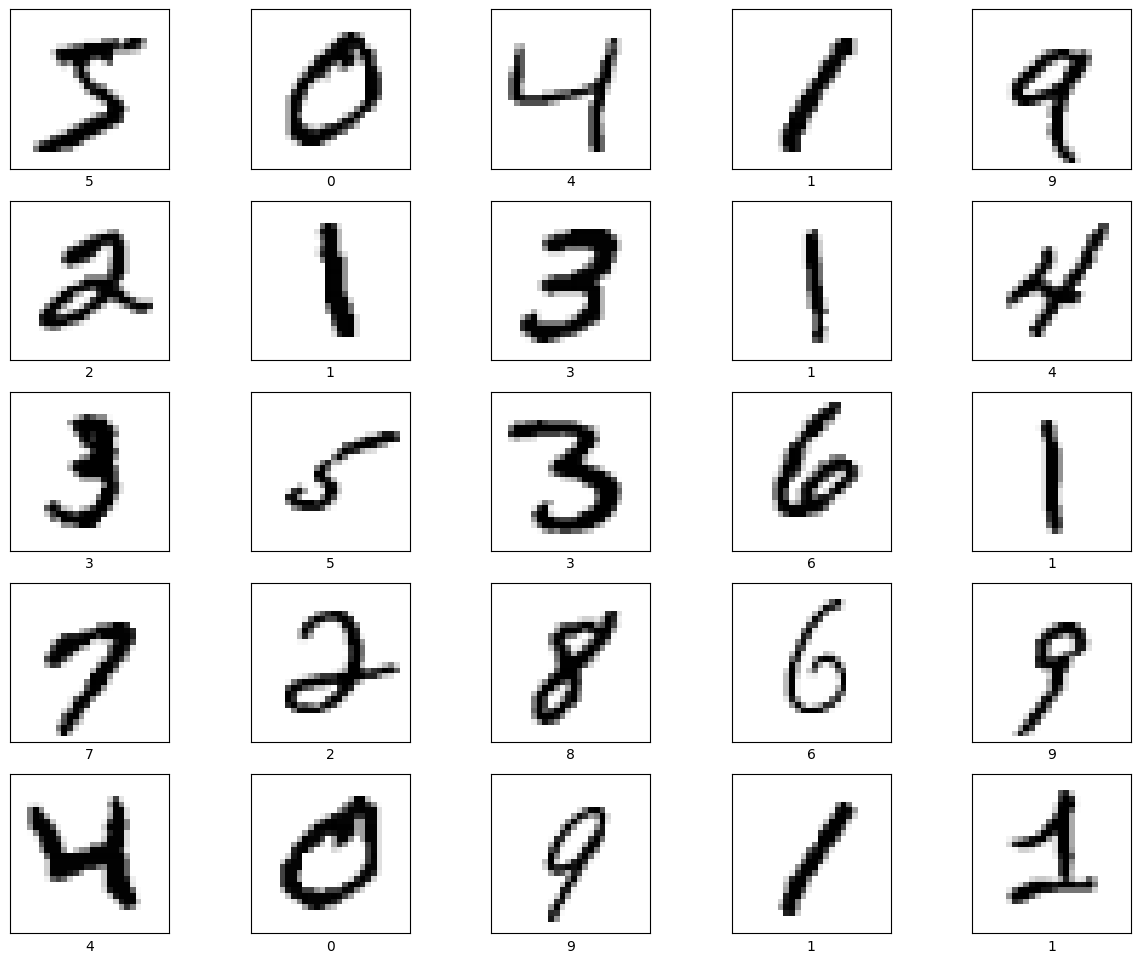

In [ ]:
plt.figure(figsize=(15,12))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

**Reshape images for CNN**

In [ ]:
train_images_cnn = train_images.reshape(-1, 28, 28, 1)
test_images_cnn = test_images.reshape(-1, 28, 28, 1)

**Create and compile the ANN model**

In [ ]:
ann_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Train the ANN model**

In [ ]:
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
ann_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ann_history = ann_model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8245 - loss: 6.8207 - val_accuracy: 0.8797 - val_loss: 0.5129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9044 - loss: 0.4036 - val_accuracy: 0.9114 - val_loss: 0.3935
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9272 - loss: 0.2764 - val_accuracy: 0.9206 - val_loss: 0.3538
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9356 - loss: 0.2409 - val_accuracy: 0.9339 - val_loss: 0.2827
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9441 - loss: 0.2095 - val_accuracy: 0.9350 - val_loss: 0.2806
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9479 - loss: 0.1914 - val_accuracy: 0.9403 - val_loss: 0.2580
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9496 - loss: 0.1927 - val_accuracy: 0.9482 - val_loss: 0.2263
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9524 - loss: 0.182

**Create and Compile the CNN model**

In [ ]:
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Train the CNN model**

In [ ]:
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_data=(test_images_cnn, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8951 - loss: 1.6153 - val_accuracy: 0.9773 - val_loss: 0.0674
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9812 - loss: 0.0592 - val_accuracy: 0.9838 - val_loss: 0.0553
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 35ms/step - accuracy: 0.9861 - loss: 0.0450 - val_accuracy: 0.9832 - val_loss: 0.0559
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9851 - val_loss: 0.0445
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 33ms/step - accuracy: 0.9911 - loss: 0.0301 - val_accuracy: 0.9849 - val_loss: 0.0564
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9866 - val_loss: 0.0493
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.9922 - loss: 0.0256 - val_accuracy: 0.9865 - val_loss: 0.0524
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9939 -

**Function to plot accuracy and loss**

In [ ]:
def plot_history(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title(f'{model_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

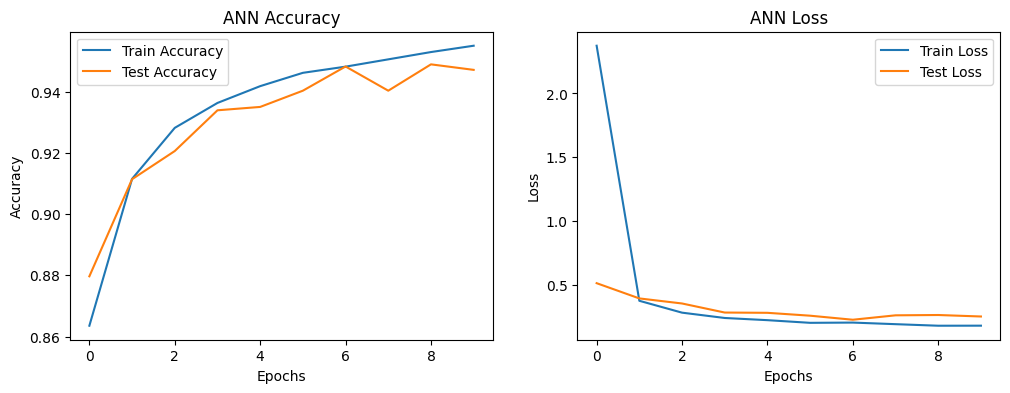

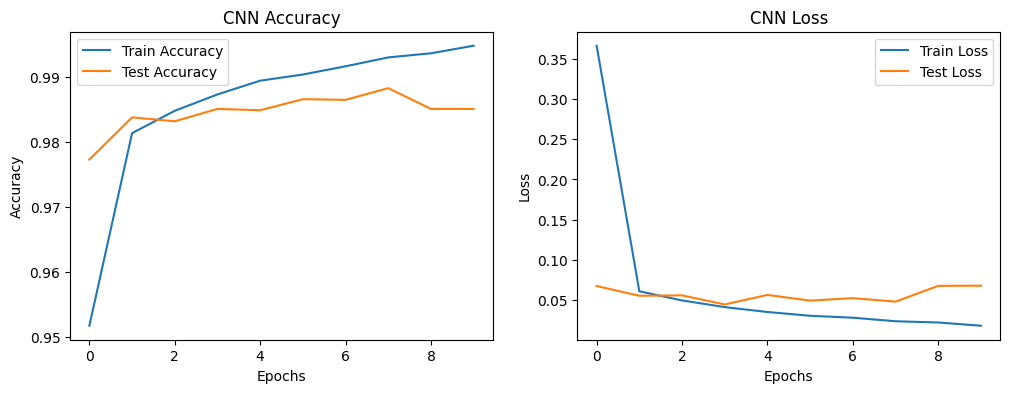

In [ ]:
plot_history(ann_history, "ANN")
plot_history(cnn_history, "CNN")

**Evaluate both models**

In [ ]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels)
cnn_loss, cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9384 - loss: 0.2902
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9800 - loss: 0.0900


In [ ]:
print(f'ANN Test Accuracy: {ann_accuracy:.4f}')
print(f'CNN Test Accuracy: {cnn_accuracy:.4f}')

ANN Test Accuracy: 0.9471
CNN Test Accuracy: 0.9851
